# Air Quality Index prediction on Beijing air quality data

## We will take two datasets from different air quality stations in Beijing
## and use them as Training and Validation datasets

In [1]:
import pandas as pd

df = pd.read_csv('Beijing/PRSA_Data_Gucheng_20130301-20170228.csv')
df_val = pd.read_csv('Beijing/PRSA_Data_Huairou_20130301-20170228.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
35060,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
35061,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
35062,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


## - We create a time series column 'date' from four separate columns;
## - We dropping excessive columns;
## - We convert C0 values from micrograms to miligrams (for latter AQI formula)

In [2]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)
df.drop(['No','year', 'month', 'day', 'hour', 'wd', 'station'], axis=1, inplace=True)
df['CO'] = df['CO']/1000

df_val['date'] = pd.to_datetime(df_val[['year', 'month', 'day', 'hour']])
df_val.set_index('date', inplace=True)
df_val.drop(['No','year', 'month', 'day', 'hour', 'wd', 'station'], axis=1, inplace=True)
df_val['CO'] = df_val['CO']/1000

df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01 00:00:00,6.0,18.0,5.0,NaN,0.8,88.0,0.1,1021.1,-18.6,0.0,4.4
2013-03-01 01:00:00,6.0,15.0,5.0,NaN,0.8,88.0,-0.3,1021.5,-19.0,0.0,4.0
2013-03-01 02:00:00,5.0,18.0,NaN,NaN,0.7,52.0,-0.7,1021.5,-19.8,0.0,4.6
2013-03-01 03:00:00,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,2.8
2013-03-01 04:00:00,5.0,17.0,5.0,NaN,0.6,73.0,-1.3,1023.0,-21.4,0.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,14.0,58.0,4.0,19.0,0.5,56.0,12.8,1009.9,-17.0,0.0,3.1
2017-02-28 20:00:00,27.0,83.0,6.0,60.0,0.7,26.0,11.1,1010.4,-15.5,0.0,1.9
2017-02-28 21:00:00,22.0,37.0,7.0,52.0,0.6,27.0,10.5,1010.8,-15.9,0.0,2.3


In [3]:
print(df.shape)
print(df_val.shape)

(35064, 11)
(35064, 11)


# Filling NaNs with with mean column values

In [4]:
def fillna_mean(df):
    for cols in list(df.columns[df.isnull().sum() > 0]):
        mean_val = df[cols].mean()  # mean fill
        df[cols].fillna(mean_val, inplace=True)
    return df

In [5]:
fillna_mean(df)
fillna_mean(df_val)

print(df.isna().sum())
print(df_val.isna().sum())

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


# Calculating Air Quality Index

## Formula
![](https://i.imgur.com/vQR5Zy0.png)

In [6]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0


df["PM2.5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))
df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))
df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))
df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))
df["O3_SubIndex"] = df["O3"].apply(lambda x: get_O3_subindex(x))

df_val["PM2.5_SubIndex"] = df_val["PM2.5"].apply(lambda x: get_PM25_subindex(x))
df_val["PM10_SubIndex"] = df_val["PM10"].apply(lambda x: get_PM10_subindex(x))
df_val["SO2_SubIndex"] = df_val["SO2"].apply(lambda x: get_SO2_subindex(x))
df_val["CO_SubIndex"] = df_val["CO"].apply(lambda x: get_CO_subindex(x))
df_val["O3_SubIndex"] = df_val["O3"].apply(lambda x: get_O3_subindex(x))


In [7]:
import numpy as np
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# Calculating AQI on our training dataset

In [8]:
df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(13)
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated,AQI_bucket_calculated
date,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,18.0,5.000000,55.871075,0.800000,88.000000,0.1,1021.1,-18.6,0.0,4.4,10.000000,18.0,6.250000,40.000000,88.000000,88.0,Satisfactory
2013-03-01 01:00:00,6.0,15.0,5.000000,55.871075,0.800000,88.000000,-0.3,1021.5,-19.0,0.0,4.0,10.000000,15.0,6.250000,40.000000,88.000000,88.0,Satisfactory
2013-03-01 02:00:00,5.0,18.0,15.366162,55.871075,0.700000,52.000000,-0.7,1021.5,-19.8,0.0,4.6,8.333333,18.0,19.207702,35.000000,52.000000,52.0,Satisfactory
2013-03-01 03:00:00,6.0,20.0,6.000000,55.871075,1.323974,57.694879,-1.0,1022.7,-21.2,0.0,2.8,10.000000,20.0,7.500000,66.198721,57.694879,66.0,Satisfactory
2013-03-01 04:00:00,5.0,17.0,5.000000,55.871075,0.600000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,8.333333,17.0,6.250000,30.000000,73.000000,73.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,14.0,58.0,4.000000,19.000000,0.500000,56.000000,12.8,1009.9,-17.0,0.0,3.1,23.333333,58.0,5.000000,25.000000,56.000000,58.0,Satisfactory
2017-02-28 20:00:00,27.0,83.0,6.000000,60.000000,0.700000,26.000000,11.1,1010.4,-15.5,0.0,1.9,45.000000,83.0,7.500000,35.000000,26.000000,83.0,Satisfactory
2017-02-28 21:00:00,22.0,37.0,7.000000,52.000000,0.600000,27.000000,10.5,1010.8,-15.9,0.0,2.3,36.666667,37.0,8.750000,30.000000,27.000000,37.0,Good


# Same on validation dataset...

In [9]:
df_val["AQI_calculated"] = round(df_val[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df_val.loc[df_val["PM2.5_SubIndex"] + df_val["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

df_val["AQI_bucket_calculated"] = df_val["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df_val[~df.AQI_calculated.isna()].head(13)
df_val

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated,AQI_bucket_calculated
date,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,7.0,7.0,3.000000,2.00000,0.100000,91.000000,-2.3,1020.3,-20.7,0.0,3.1,11.666667,7.0,3.750000,5.000000,91.000000,91.0,Satisfactory
2013-03-01 01:00:00,4.0,4.0,3.000000,32.49725,0.100000,92.000000,-2.7,1020.8,-20.5,0.0,1.5,6.666667,4.0,3.750000,5.000000,92.000000,92.0,Satisfactory
2013-03-01 02:00:00,4.0,4.0,12.121553,32.49725,0.100000,91.000000,-3.2,1020.6,-21.4,0.0,1.8,6.666667,4.0,15.151941,5.000000,91.000000,91.0,Satisfactory
2013-03-01 03:00:00,3.0,3.0,3.000000,2.00000,1.022555,59.824713,-3.3,1021.3,-23.7,0.0,2.4,5.000000,3.0,3.750000,51.127727,59.824713,60.0,Satisfactory
2013-03-01 04:00:00,3.0,3.0,7.000000,32.49725,0.300000,86.000000,-4.1,1022.1,-22.7,0.0,2.2,5.000000,3.0,8.750000,15.000000,86.000000,86.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,16.0,28.0,2.000000,19.00000,0.300000,95.000000,9.9,1008.6,-14.1,0.0,1.8,26.666667,28.0,2.500000,15.000000,95.000000,95.0,Satisfactory
2017-02-28 20:00:00,21.0,34.0,4.000000,24.00000,0.500000,80.000000,9.5,1008.9,-14.4,0.0,1.3,35.000000,34.0,5.000000,25.000000,80.000000,80.0,Satisfactory
2017-02-28 21:00:00,17.0,33.0,2.000000,39.00000,0.900000,60.000000,8.4,1009.3,-14.6,0.0,1.5,28.333333,33.0,2.500000,45.000000,60.000000,60.0,Satisfactory


# Preparing the dataset for our task: To predict calculated AQI value based on initial dataset features.
# We remove excessive columns, leaving only AQI index as target

In [10]:
dataset = df.copy()
dataset['target'] = dataset['AQI_calculated']
dataset.drop(['PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'CO_SubIndex', 'O3_SubIndex', 'AQI_calculated',
       'AQI_bucket_calculated', 'TEMP', 'RAIN', 'WSPM'], axis=1, inplace=True)
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,DEWP,target
date,,,,,,,,,
2013-03-01 00:00:00,6.0,18.0,5.000000,55.871075,0.800000,88.000000,1021.1,-18.6,88.0
2013-03-01 01:00:00,6.0,15.0,5.000000,55.871075,0.800000,88.000000,1021.5,-19.0,88.0
2013-03-01 02:00:00,5.0,18.0,15.366162,55.871075,0.700000,52.000000,1021.5,-19.8,52.0
2013-03-01 03:00:00,6.0,20.0,6.000000,55.871075,1.323974,57.694879,1022.7,-21.2,66.0
2013-03-01 04:00:00,5.0,17.0,5.000000,55.871075,0.600000,73.000000,1023.0,-21.4,73.0
...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,14.0,58.0,4.000000,19.000000,0.500000,56.000000,1009.9,-17.0,58.0
2017-02-28 20:00:00,27.0,83.0,6.000000,60.000000,0.700000,26.000000,1010.4,-15.5,83.0
2017-02-28 21:00:00,22.0,37.0,7.000000,52.000000,0.600000,27.000000,1010.8,-15.9,37.0


# Same for the validation dataset...

In [11]:
dataset_val = df_val.copy()
dataset_val['target'] = dataset_val['AQI_calculated']
dataset_val.drop(['PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'CO_SubIndex', 'O3_SubIndex', 'AQI_calculated',
       'AQI_bucket_calculated', 'TEMP', 'RAIN', 'WSPM'], axis=1, inplace=True)
dataset_val

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,DEWP,target
date,,,,,,,,,
2013-03-01 00:00:00,7.0,7.0,3.000000,2.00000,0.100000,91.000000,1020.3,-20.7,91.0
2013-03-01 01:00:00,4.0,4.0,3.000000,32.49725,0.100000,92.000000,1020.8,-20.5,92.0
2013-03-01 02:00:00,4.0,4.0,12.121553,32.49725,0.100000,91.000000,1020.6,-21.4,91.0
2013-03-01 03:00:00,3.0,3.0,3.000000,2.00000,1.022555,59.824713,1021.3,-23.7,60.0
2013-03-01 04:00:00,3.0,3.0,7.000000,32.49725,0.300000,86.000000,1022.1,-22.7,86.0
...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,16.0,28.0,2.000000,19.00000,0.300000,95.000000,1008.6,-14.1,95.0
2017-02-28 20:00:00,21.0,34.0,4.000000,24.00000,0.500000,80.000000,1008.9,-14.4,80.0
2017-02-28 21:00:00,17.0,33.0,2.000000,39.00000,0.900000,60.000000,1009.3,-14.6,60.0


# Preparing the datasets

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = dataset.drop(columns=['target'])
X = scaler.fit_transform(X)
y = dataset['target']

X_val = dataset_val.drop(columns=['target'])
X_val = scaler.fit_transform(X_val)
y_val = dataset_val['target']

# Checking the shapes

In [13]:
print(f"X shape: {X.shape},  X_val shape: {X_val.shape}")
print(f"y shape: {y.shape},     y_val shape: {y_val.shape}")

X shape: (35064, 8),  X_val shape: (35064, 8)
y shape: (35064,),     y_val shape: (35064,)


# Trying Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=50, n_jobs=-1)

# Train the model
rf_model.fit(X, y)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_rf)
r2 = r2_score(y_val, y_pred_rf)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Squared Error: 872.9893995893224
R-squared (R2): 0.936542010357956


# Visualising prediction Vs actual data

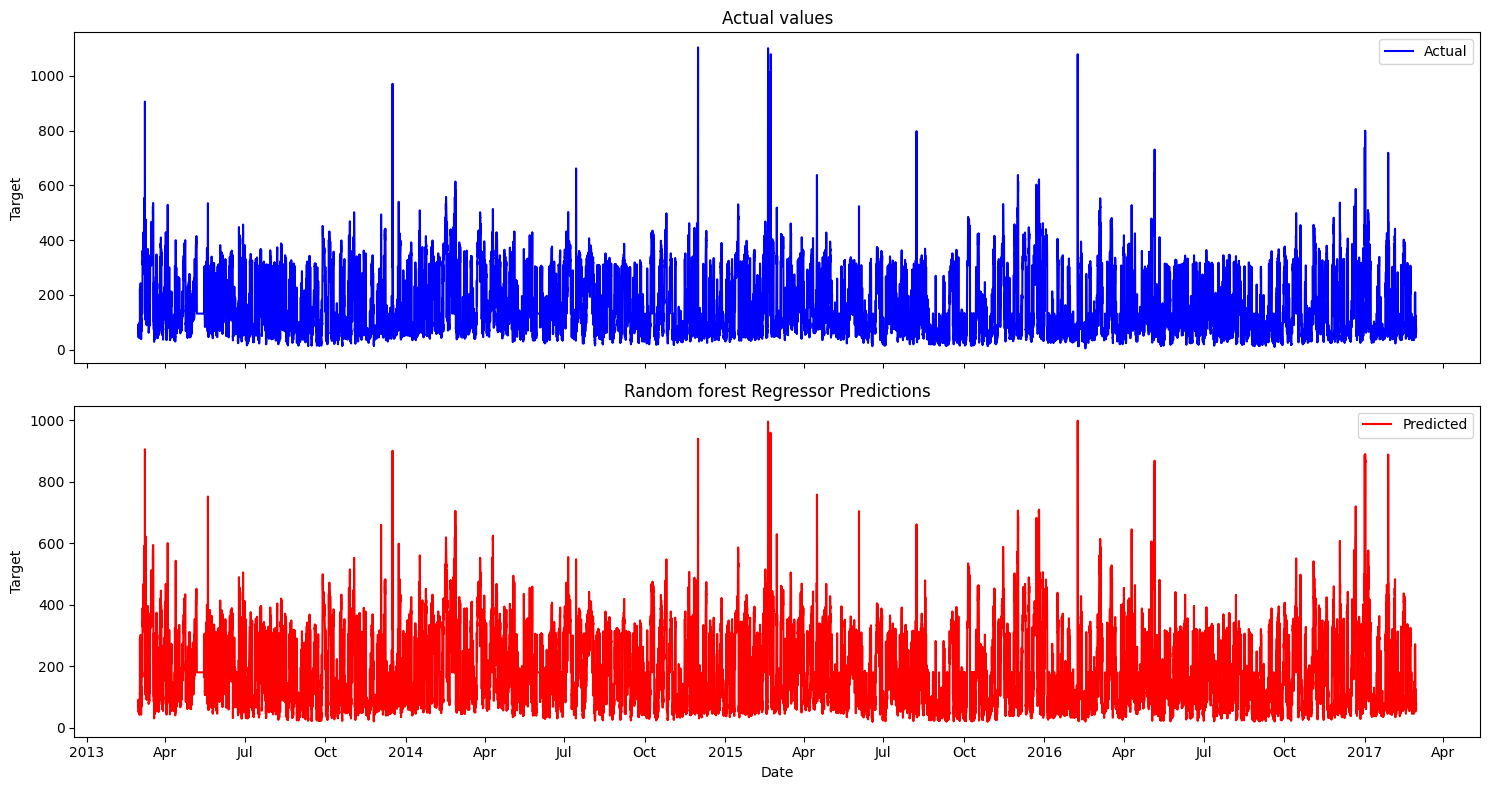

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot y_val (actual values) in the first subplot
ax1.plot(y_val.index, y_val, label='Actual', color='blue')
ax1.set_ylabel('Target')
ax1.set_title('Actual values')
ax1.legend()

# Plot y_pred (predicted values) in the second subplot
ax2.plot(y_val.index, y_pred_rf, label='Predicted', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Target')
ax2.set_title('Random forest Regressor Predictions')
ax2.legend()

# Customize X-axis tick labels to show more dates
date_locator = mdates.AutoDateLocator(minticks=5, maxticks=20)
date_formatter = mdates.ConciseDateFormatter(date_locator)
ax2.xaxis.set_major_locator(date_locator)
ax2.xaxis.set_major_formatter(date_formatter)

# Show the plot
plt.tight_layout()
plt.show()


# Trying XGBRegressor

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=50, min_child_weight=3, max_depth=4)

# Train the model
xgb_model.fit(X, y)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_xgb)
r2 = r2_score(y_val, y_pred_xgb)

print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Squared Error: 863.4016584128905
R-squared (R2): 0.9372389475493479


# Visualising prediction Vs actual data

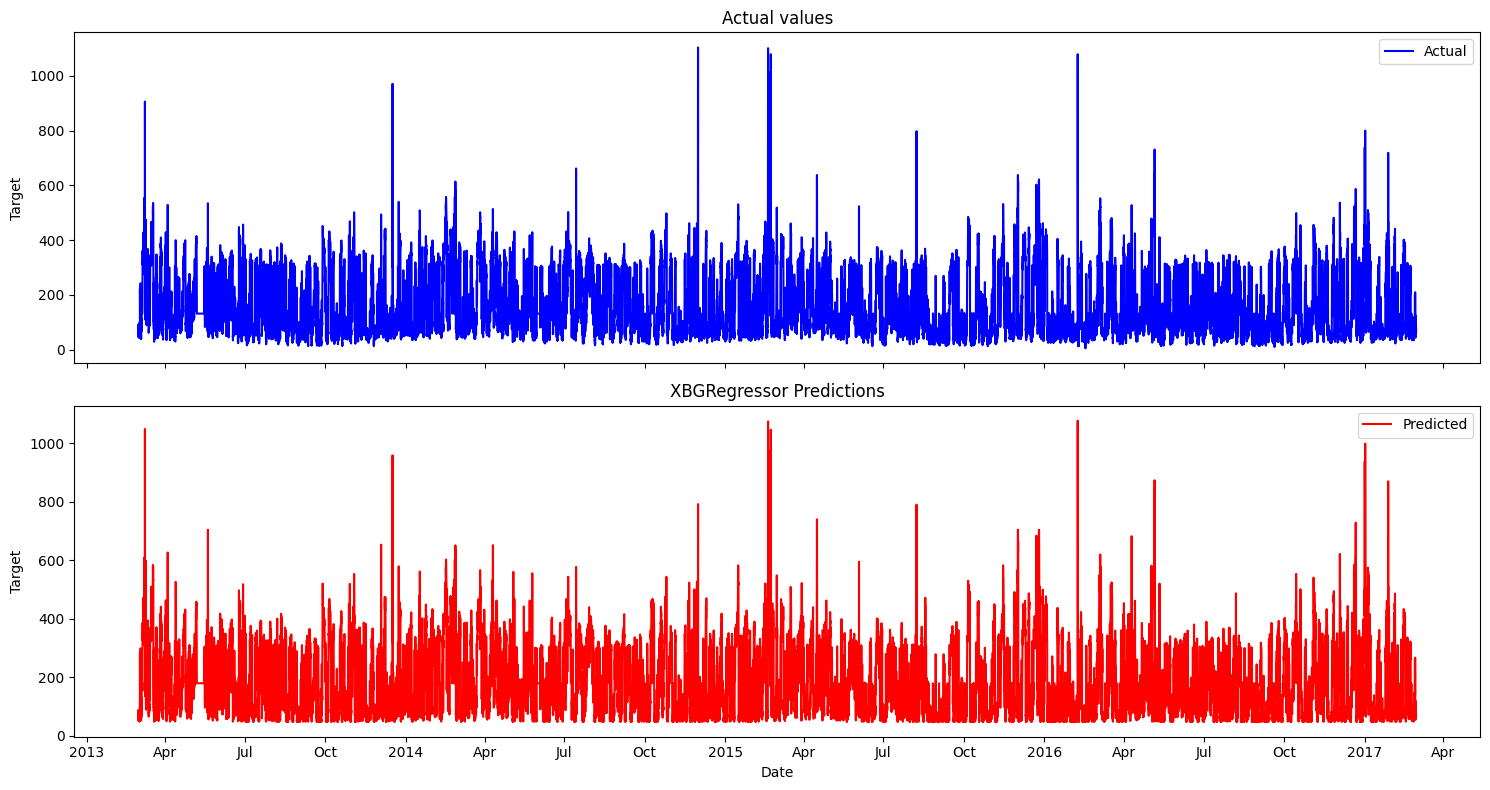

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot y_val (actual values) in the first subplot
ax1.plot(y_val.index, y_val, label='Actual', color='blue')
ax1.set_ylabel('Target')
ax1.set_title('Actual values')
ax1.legend()

# Plot y_pred (predicted values) in the second subplot
ax2.plot(y_val.index, y_pred_xgb, label='Predicted', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Target')
ax2.set_title('XBGRegressor Predictions')
ax2.legend()

# Customize X-axis tick labels to show more dates
date_locator = mdates.AutoDateLocator(minticks=5, maxticks=20)
date_formatter = mdates.ConciseDateFormatter(date_locator)
ax2.xaxis.set_major_locator(date_locator)
ax2.xaxis.set_major_formatter(date_formatter)

# Show the plot
plt.tight_layout()
plt.show()


# Trying Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create the GBM regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
)

# Train the model on your training data (X, y)
gbr_model.fit(X, y)

# Make predictions on the validation set (X_val)
y_pred_gbr = gbr_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_gbr)
r2 = r2_score(y_val, y_pred_gbr)

print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Squared Error: 901.6943139810546
R-squared (R2): 0.9344554373010515


# Visualising prediction Vs actual data

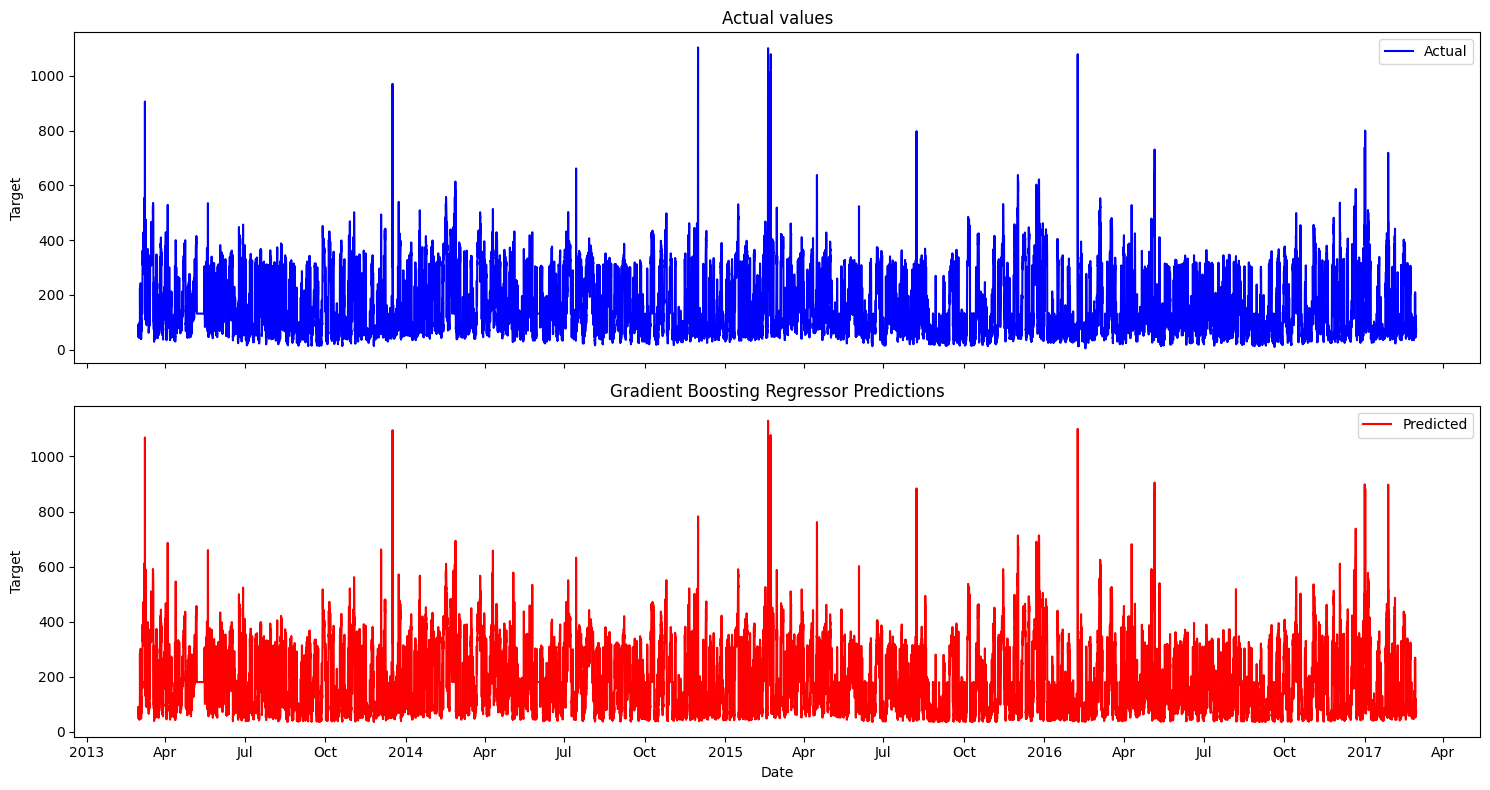

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot y_val (actual values) in the first subplot
ax1.plot(y_val.index, y_val, label='Actual', color='blue')
ax1.set_ylabel('Target')
ax1.set_title('Actual values')
ax1.legend()

# Plot y_pred (predicted values) in the second subplot
ax2.plot(y_val.index, y_pred_gbr, label='Predicted', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Target')
ax2.set_title('Gradient Boosting Regressor Predictions')
ax2.legend()

# Customize X-axis tick labels to show more dates
date_locator = mdates.AutoDateLocator(minticks=5, maxticks=20)
date_formatter = mdates.ConciseDateFormatter(date_locator)
ax2.xaxis.set_major_locator(date_locator)
ax2.xaxis.set_major_formatter(date_formatter)

# Show the plot
plt.tight_layout()
plt.show()


# Trying Sequential Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer='l2', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(96, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(Dense(1))  # Output layer for regression tasks


model.summary()


2023-08-24 14:43:51.065401: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                12384     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 97        
                                                                 
Total params: 13633 (53.25 KB)
Trainable params: 13633 (53.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
from tensorflow.keras import backend as K

# Custom R-squared metric function
def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mae', metrics=['mse', r2_metric])

# Train the model on your training data (X, y)
history = model.fit(X, y, batch_size=64, epochs=16, validation_split=0.2, verbose=1)

Epoch 1/16
439/439 [==============================] - 3s 2ms/step - loss: 57.7733 - mse: 8398.5566 - r2_metric: 0.4249 - val_loss: 26.5318 - val_mse: 1728.0891 - val_r2_metric: 0.8498
Epoch 2/16
439/439 [==============================] - 1s 2ms/step - loss: 31.0325 - mse: 1880.1602 - r2_metric: 0.8744 - val_loss: 20.2048 - val_mse: 700.4719 - val_r2_metric: 0.9140
Epoch 3/16
439/439 [==============================] - 1s 2ms/step - loss: 28.8998 - mse: 1618.0970 - r2_metric: 0.8918 - val_loss: 18.5294 - val_mse: 578.7163 - val_r2_metric: 0.9240
Epoch 4/16
439/439 [==============================] - 1s 2ms/step - loss: 28.0253 - mse: 1544.5247 - r2_metric: 0.8971 - val_loss: 18.5992 - val_mse: 657.8107 - val_r2_metric: 0.9251
Epoch 5/16
439/439 [==============================] - 1s 2ms/step - loss: 27.5868 - mse: 1491.1862 - r2_metric: 0.9003 - val_loss: 16.1982 - val_mse: 436.8805 - val_r2_metric: 0.9373
Epoch 6/16
439/439 [==============================] - 1s 2ms/step - loss: 27.0040 - 

In [22]:
# Make predictions on the validation set (X_val)
y_pred_seq = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_seq)
r2 = r2_score(y_val, y_pred_seq)

print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

1096/1096 [==============================] - 1s 904us/step
Mean Squared Error: 948.013317873117
R-squared (R2): 0.9310884882056845


# Visualising prediction Vs actual data

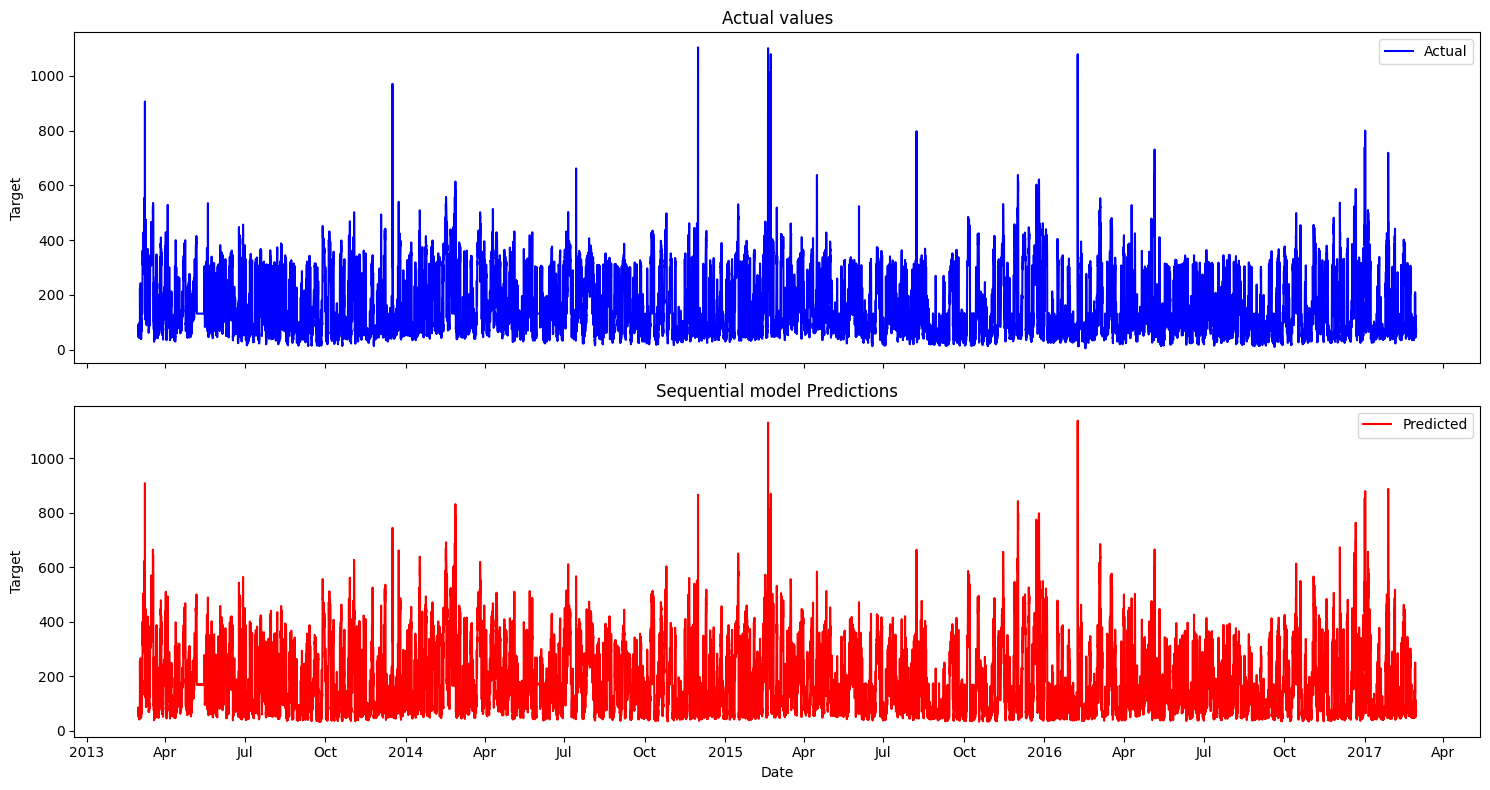

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot y_val (actual values) in the first subplot
ax1.plot(y_val.index, y_val, label='Actual', color='blue')
ax1.set_ylabel('Target')
ax1.set_title('Actual values')
ax1.legend()

# Plot y_pred (predicted values) in the second subplot
ax2.plot(y_val.index, y_pred_seq, label='Predicted', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Target')
ax2.set_title('Sequential model Predictions')
ax2.legend()

# Customize X-axis tick labels to show more dates
date_locator = mdates.AutoDateLocator(minticks=5, maxticks=20)
date_formatter = mdates.ConciseDateFormatter(date_locator)
ax2.xaxis.set_major_locator(date_locator)
ax2.xaxis.set_major_formatter(date_formatter)

# Show the plot
plt.tight_layout()
plt.show()


# Comparing results

In [24]:
columns = ['Metrics', 'Random_Forest', 'XGB_Regressor', 'Gradient_Boosting', 'Sequential']
row1 = ['MSE', mean_squared_error(y_val, y_pred_rf), mean_squared_error(y_val, y_pred_xgb), mean_squared_error(y_val, y_pred_gbr), mean_squared_error(y_val, y_pred_seq)]
row2 = ['R2_score', r2_score(y_val, y_pred_rf), r2_score(y_val, y_pred_xgb), r2_score(y_val, y_pred_gbr), r2_score(y_val, y_pred_seq)]

data = [row1, row2]
results = pd.DataFrame(data, columns=columns)
results


,Metrics,Random_Forest,XGB_Regressor,Gradient_Boosting,Sequential
0,MSE,872.989400,863.401658,901.694314,948.013318
1,R2_score,0.936542,0.937239,0.934455,0.931088
